
MF 3, 10, and 13 are all different types of reaction cross sections -- generic, radioisotope production, and photon production respectively.

For neutrons MT=1 is the total cross section, but is undefined for charged particles. For any projectile particle, MT=2  is the total elastic cross section.  For neutrons only, MT=1 data is the sum of the MT=2 cross section and the MT=3 cross section. For charged particles, MT=3 is the total inelastic or nonelastic cross section.  

https://luca-fiorito-11.github.io/sandy-docs/endf6.html#the-data-type-number-mf


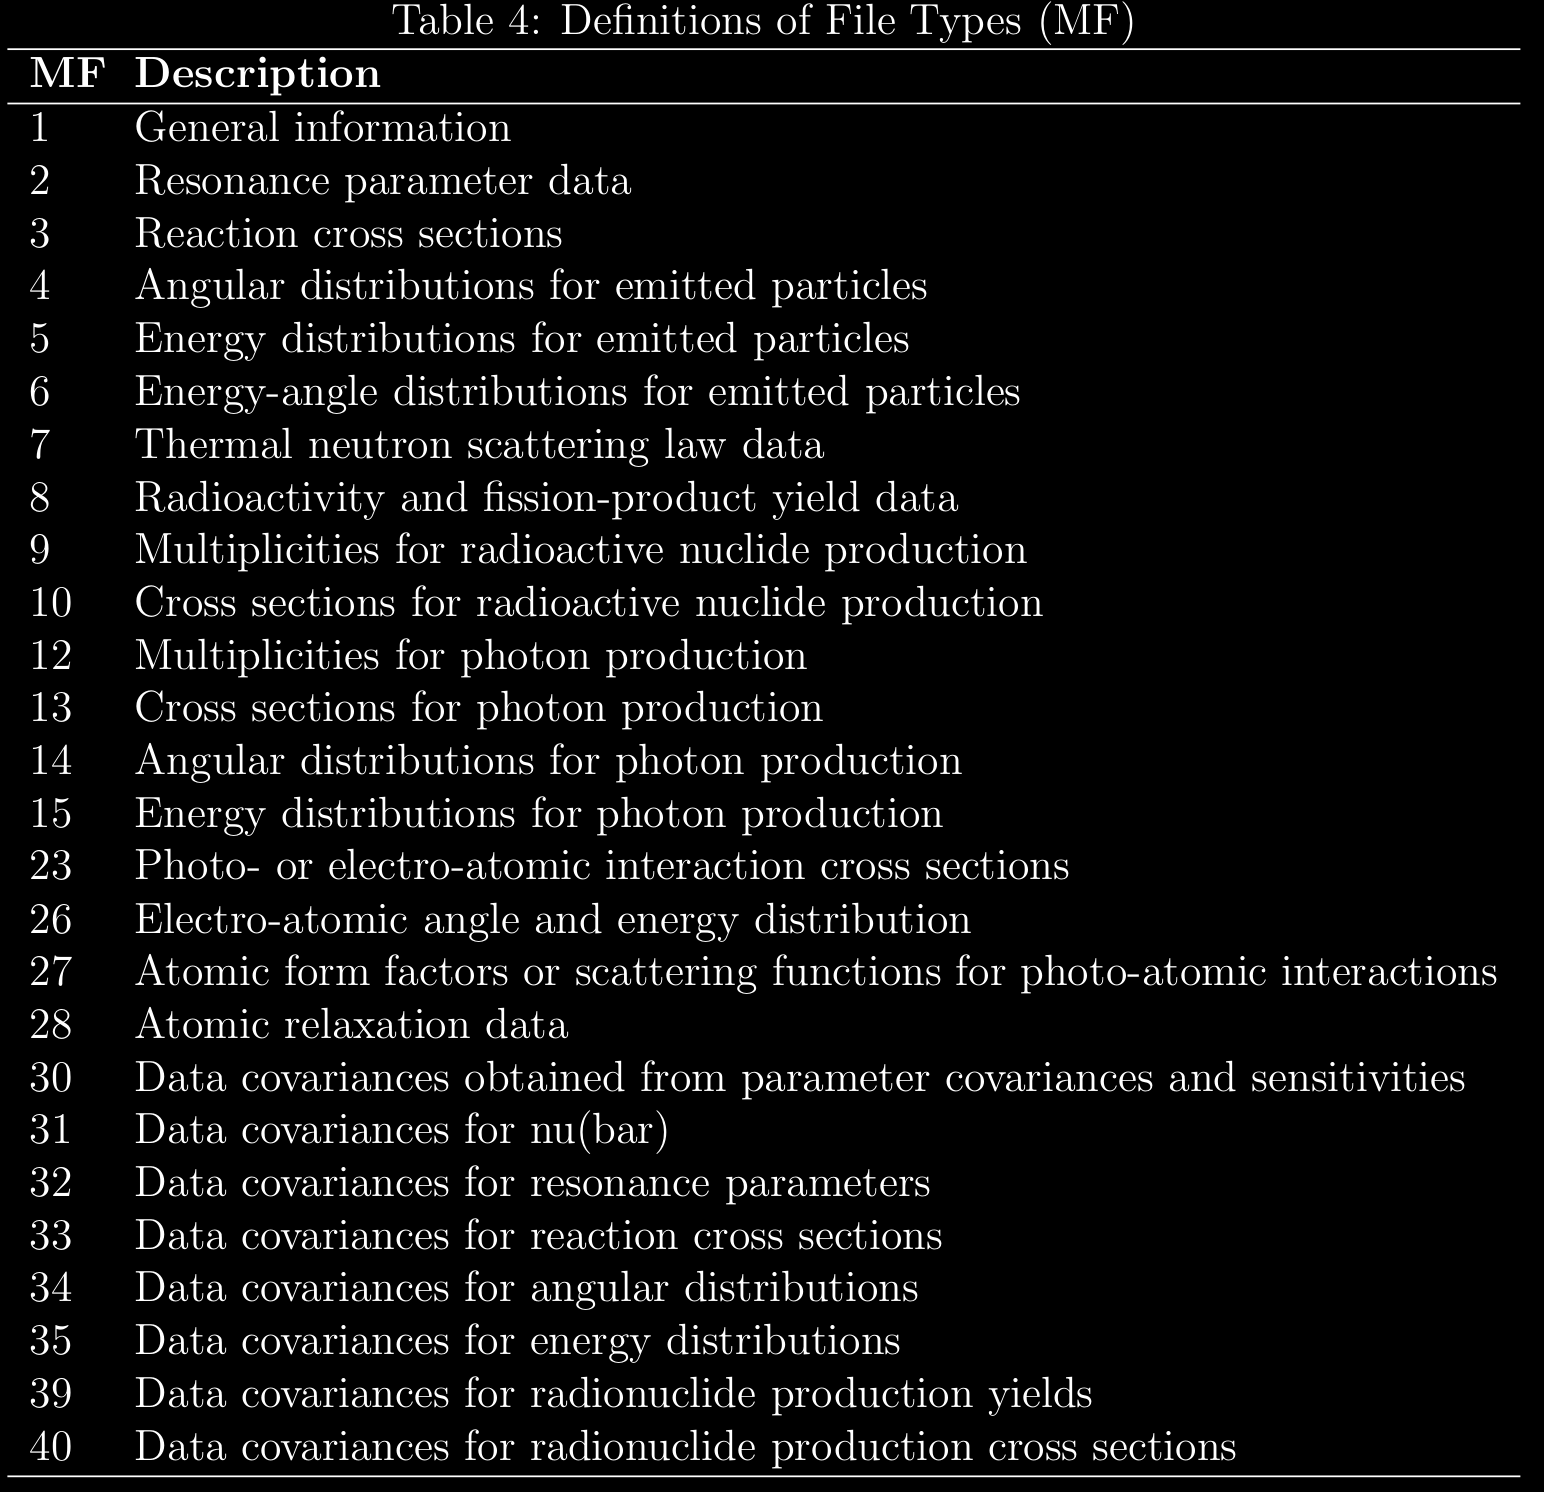

machine specific multithreading 

using IJulia

installkernel("Julia (70 threads)", env=Dict("JULIA_NUM_THREADS"=>"70"))

In [1]:
Threads.nthreads()

70

# Now we do the boring work of setting which columns correspond to what data in .c4 files in the EXFOR directory.

In [2]:
raw_labels = "# Prj Targ M MF MT PXC  Energy  dEnergy  Data      dData   Cos/LO   dCos/LO   ELV/HL  dELV/HL I78 Refer (YY)              EntrySubP"
spacing    = "#---><---->o<-><-->ooo<-------><-------><-------><-------><-------><-------><-------><-------><-><-----------------------><---><->o"
label_list = split(raw_labels)

19-element Vector{SubString{String}}:
 "#"
 "Prj"
 "Targ"
 "M"
 "MF"
 "MT"
 "PXC"
 "Energy"
 "dEnergy"
 "Data"
 "dData"
 "Cos/LO"
 "dCos/LO"
 "ELV/HL"
 "dELV/HL"
 "I78"
 "Refer"
 "(YY)"
 "EntrySubP"

In [3]:
spacing_intervals = split(spacing, ">")
fixed_spacing_intervals = []
for x in spacing_intervals
    if occursin("#", x)
        push!(fixed_spacing_intervals, "#")
        push!(fixed_spacing_intervals, x[2:end] * ">")
    elseif occursin("o", x)
        parts = split(x, "<")
        push!(fixed_spacing_intervals, parts[1])
        if length(parts) > 1
            parts[2] = "<" * parts[2] * ">"
            push!(fixed_spacing_intervals, parts[2])
        end
    else 
        x = x * ">"
        push!(fixed_spacing_intervals, x)
    end
end
fixed_spacing_intervals

20-element Vector{Any}:
 "#"
 "--->"
 "<---->"
 "o"
 "<->"
 "<-->"
 "ooo"
 "<------->"
 "<------->"
 "<------->"
 "<------->"
 "<------->"
 "<------->"
 "<------->"
 "<------->"
 "<->"
 "<----------------------->"
 "<--->"
 "<->"
 "o"

In [4]:
label_dict = Dict()
for i in 1:length(label_list)
    if label_list[i] == "Refer"
        break
    end
    label_dict[label_list[i]] = fixed_spacing_intervals[i]
end
label_dict["Refer (YY)"] = "<----------------------->"
label_dict["Entry"] = "<--->"
label_dict["Sub"] = "<->" 
label_dict["P"] = "o"
label_dict

Dict{Any, Any} with 20 entries:
  "Targ"       => "<---->"
  "Entry"      => "<--->"
  "P"          => "o"
  "dCos/LO"    => "<------->"
  "I78"        => "<->"
  "dEnergy"    => "<------->"
  "dELV/HL"    => "<------->"
  "M"          => "o"
  "Refer (YY)" => "<----------------------->"
  "Prj"        => "--->"
  "Energy"     => "<------->"
  "Cos/LO"     => "<------->"
  "#"          => "#"
  "ELV/HL"     => "<------->"
  "MF"         => "<->"
  "dData"      => "<------->"
  "Data"       => "<------->"
  "Sub"        => "<->"
  "PXC"        => "ooo"
  "MT"         => "<-->"

In [5]:
fixed_labels = label_list[1:end-3]
for x in ["Refer (YY)", "Entry", "Sub", "P"]
    push!(fixed_labels, x)
end
fixed_labels

20-element Vector{SubString{String}}:
 "#"
 "Prj"
 "Targ"
 "M"
 "MF"
 "MT"
 "PXC"
 "Energy"
 "dEnergy"
 "Data"
 "dData"
 "Cos/LO"
 "dCos/LO"
 "ELV/HL"
 "dELV/HL"
 "I78"
 "Refer (YY)"
 "Entry"
 "Sub"
 "P"

In [6]:
label_columns_dict = Dict()
label_starts_ends_dict = Dict()
for i in 1:length(fixed_labels)
    label = fixed_labels[i]
    spacing = length(label_dict[label])
    label_columns_dict[label] = spacing
    if i == 1
        label_starts_ends_dict[label] = [1, 1] 
    else
        left_old_label = fixed_labels[i-1]
        start_col = label_starts_ends_dict[left_old_label][2]
        label_starts_ends_dict[label] = [start_col+1, spacing + start_col] 
    end
end
label_columns_dict

Dict{Any, Any} with 20 entries:
  "Targ"       => 6
  "Entry"      => 5
  "P"          => 1
  "dCos/LO"    => 9
  "I78"        => 3
  "dEnergy"    => 9
  "dELV/HL"    => 9
  "M"          => 1
  "Refer (YY)" => 25
  "Prj"        => 4
  "Energy"     => 9
  "Cos/LO"     => 9
  "#"          => 1
  "ELV/HL"     => 9
  "MF"         => 3
  "dData"      => 9
  "Data"       => 9
  "Sub"        => 3
  "PXC"        => 3
  "MT"         => 4

In [7]:
label_starts_ends_dict

Dict{Any, Any} with 20 entries:
  "Targ"       => [6, 11]
  "Entry"      => [123, 127]
  "P"          => [131, 131]
  "dCos/LO"    => [68, 76]
  "I78"        => [95, 97]
  "dEnergy"    => [32, 40]
  "dELV/HL"    => [86, 94]
  "M"          => [12, 12]
  "Refer (YY)" => [98, 122]
  "Prj"        => [2, 5]
  "Energy"     => [23, 31]
  "Cos/LO"     => [59, 67]
  "#"          => [1, 1]
  "ELV/HL"     => [77, 85]
  "MF"         => [13, 15]
  "dData"      => [50, 58]
  "Data"       => [41, 49]
  "Sub"        => [128, 130]
  "PXC"        => [20, 22]
  "MT"         => [16, 19]

# Now to set the directory where the data lives

In [8]:
exfor_dir = "/home/marcos/Compressed_Cross_Section_Data/EXFOR/"
alpha_particles_dir = exfor_dir * "alphas/"
alpha_particle_files = [x for x in readdir(alpha_particles_dir) if occursin(".c4", x)]

314-element Vector{String}:
 "001_H_000.c4"
 "001_H_001.c4"
 "001_H_002.c4"
 "001_H_003.c4"
 "002_He_003.c4"
 "002_He_004.c4"
 "002_He_006.c4"
 "003_Li_000.c4"
 "003_Li_006.c4"
 "003_Li_007.c4"
 "003_Li_008.c4"
 "004_Be_009.c4"
 "005_B_000.c4"
 ⋮
 "093_Np_237.c4"
 "094_Pu_238.c4"
 "094_Pu_239.c4"
 "094_Pu_240.c4"
 "094_Pu_242.c4"
 "094_Pu_244.c4"
 "095_Am_241.c4"
 "095_Am_243.c4"
 "096_Cm_244.c4"
 "096_Cm_248.c4"
 "097_Bk_249.c4"
 "098_Cf_252.c4"

# Wait I think I already wrote a Julia script that imports EXFOR data

You may have to install each package individually using 

using Pkg
Pkg.add("package_name")

In [9]:
include("/home/marcos/Git_repos/Energy/Scripts/JuliaScripts/read_exfor.jl")

WebIO._IJuliaInit()

 #EXAMPLE USAGE. MIND THE FILE PATHS
data_dir = "C:\Cross-Section-Data\EXFOR\"
subdirs = [content * "\" for content in readdir(data_dir) if isdir(data_dir * "\" * content)]
for subdir in subdirs
    files = readdir(data_dir * subdir)
    test = [check_spacings(data_dir * subdir * file) for file in files]
    println("It is ", all(test),
     " that the spacings in each file are all self consistent for the subdirectory ", subdir)
end
boron_df = read_exfor_file(data_dir * "gammas\005_B_010.c4", true, [103])
boron_df[!,"Data"] = [read_irregular_datum(element, "-") for element in boron_df[!,"Data"]]
boron_df[!,"Energy"] = [read_irregular_datum(element, "+") for element in boron_df[!,"Energy"]]
fig = PlotlyJS.plot(boron_df, x=:Energy, y=:Data, color=:MT, text=:ReferYY,
                mode="markers", Layout(yaxis_type="log", xaxis_type="log"))
#Click the legend to view different MTs :) 
#Another test 
file_path = data_dir * "neutrons\092_U_238.c4"
df = read_exfor_file(file_path, [1, 2, 102]

In [10]:
data_dir = exfor_dir
subdirs = [content * "/" for content in readdir(data_dir) 
        if (isdir(data_dir * "/" * content) && content!=".ipynb_checkpoints")]

7-element Vector{String}:
 "alphas/"
 "deuterons/"
 "gammas/"
 "helions/"
 "neutrons/"
 "other/"
 "protons/"

In [11]:
files = [x for x in readdir(data_dir * subdirs[1]) if (!occursin(".ipynb", x) && x[end-2:end] == ".c4")]
files

314-element Vector{String}:
 "001_H_000.c4"
 "001_H_001.c4"
 "001_H_002.c4"
 "001_H_003.c4"
 "002_He_003.c4"
 "002_He_004.c4"
 "002_He_006.c4"
 "003_Li_000.c4"
 "003_Li_006.c4"
 "003_Li_007.c4"
 "003_Li_008.c4"
 "004_Be_009.c4"
 "005_B_000.c4"
 ⋮
 "093_Np_237.c4"
 "094_Pu_238.c4"
 "094_Pu_239.c4"
 "094_Pu_240.c4"
 "094_Pu_242.c4"
 "094_Pu_244.c4"
 "095_Am_241.c4"
 "095_Am_243.c4"
 "096_Cm_244.c4"
 "096_Cm_248.c4"
 "097_Bk_249.c4"
 "098_Cf_252.c4"

In [12]:
files[1]

"001_H_000.c4"

In [13]:
for subdir in subdirs
    files = [x for x in readdir(data_dir * subdir) if (!occursin(".ipynb", x) && x[end-2:end] == ".c4")]
    test = [check_spacings(data_dir * subdir * file) for file in files]
    println("It is ", all(test),
     " that the spacings in each file are all self consistent for the subdirectory ", subdir)
end

It is true that the spacings in each file are all self consistent for the subdirectory alphas/
It is true that the spacings in each file are all self consistent for the subdirectory deuterons/
It is true that the spacings in each file are all self consistent for the subdirectory gammas/
It is true that the spacings in each file are all self consistent for the subdirectory helions/
It is true that the spacings in each file are all self consistent for the subdirectory neutrons/
It is true that the spacings in each file are all self consistent for the subdirectory other/
It is true that the spacings in each file are all self consistent for the subdirectory protons/


In [14]:
alpha_files = [x for x in readdir(data_dir * subdirs[1]) if (!occursin(".ipynb", x) && x[end-2:end] == ".c4")]

314-element Vector{String}:
 "001_H_000.c4"
 "001_H_001.c4"
 "001_H_002.c4"
 "001_H_003.c4"
 "002_He_003.c4"
 "002_He_004.c4"
 "002_He_006.c4"
 "003_Li_000.c4"
 "003_Li_006.c4"
 "003_Li_007.c4"
 "003_Li_008.c4"
 "004_Be_009.c4"
 "005_B_000.c4"
 ⋮
 "093_Np_237.c4"
 "094_Pu_238.c4"
 "094_Pu_239.c4"
 "094_Pu_240.c4"
 "094_Pu_242.c4"
 "094_Pu_244.c4"
 "095_Am_241.c4"
 "095_Am_243.c4"
 "096_Cm_244.c4"
 "096_Cm_248.c4"
 "097_Bk_249.c4"
 "098_Cf_252.c4"

In [15]:
example_file_path = data_dir * subdirs[1] * alpha_files[2]

"/home/marcos/Compressed_Cross_Section_Data/EXFOR/alphas/001_H_001.c4"

In [16]:
example_exfor_df = read_exfor_file(example_file_path)

Row,Targ,Entry,dCos/LO,I78,dEnergy,dELV/HL,M,ReferYY,Prj,Energy,Cos/LO,ELV/HL,MF,dData,Data,Sub,PXC,MT
,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?
1,1001.0,O2441,,,3.2000+7,,,"F.Horst,ET.AL. (19)",2004.0,2.8400+8,,,3.0,0.069,0.137,13.0,D,3.0
2,1001.0,O2441,,,4.0000+7,,,"F.Horst,ET.AL. (19)",2004.0,4.7600+8,,,3.0,0.037,0.117,13.0,D,3.0
3,1001.0,O2441,,,2.8000+7,,,"F.Horst,ET.AL. (19)",2004.0,8.5200+8,,,3.0,0.035,0.104,13.0,D,3.0
4,1001.0,O1011,,,,,,"A.De Vismes,ET.AL. (02)",2004.0,3.2440+8,,,3.0,6.0000-3,0.131,2.0,,3.0
5,1001.0,A0493,,,,,,"S.R.Neumaier,ET.AL. (02)",2004.0,2.8080+9,,,3.0,9.0000-4,0.0998,2.0,D,3.0
6,1001.0,O0744,,,,,,"J.Jaros,ET.AL. (78)",2004.0,3.4800+9,,,3.0,6.2000-3,0.12,19.0,,3.0
7,1001.0,O0744,,,,,,"J.Jaros,ET.AL. (78)",2004.0,8.4000+9,,,3.0,5.7000-3,0.111,19.0,,3.0
8,1001.0,C1281,,,,,,"J.E.E.Baglin,ET.AL. (92)",2004.0,975000.0,0.939692,,4.0,0.0157,0.696,2.0,,2.0
9,1001.0,C1281,,,,,,"J.E.E.Baglin,ET.AL. (92)",2004.0,1.17e6,0.939692,,4.0,0.0157,0.471,2.0,,2.0


In [17]:
names(example_exfor_df)

18-element Vector{String}:
 "Targ"
 "Entry"
 "dCos/LO"
 "I78"
 "dEnergy"
 "dELV/HL"
 "M"
 "ReferYY"
 "Prj"
 "Energy"
 "Cos/LO"
 "ELV/HL"
 "MF"
 "dData"
 "Data"
 "Sub"
 "PXC"
 "MT"

In [18]:
relevant_columns = ["Targ", "Entry", "dEnergy", "Energy", "MF", "MT", "dData", "Data"]

8-element Vector{String}:
 "Targ"
 "Entry"
 "dEnergy"
 "Energy"
 "MF"
 "MT"
 "dData"
 "Data"

In [19]:
get_relevant_columns(exfor_df) = exfor_df[!, [:"Targ", :"Entry", :"dEnergy", :"Energy", 
        :"MF", :"MT", :"dData", :"Data"]]

get_relevant_columns (generic function with 1 method)

In [20]:
get_relevant_columns(example_exfor_df)

Row,Targ,Entry,dEnergy,Energy,MF,MT,dData,Data
,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?
1,1001.0,O2441,3.2000+7,2.8400+8,3.0,3.0,0.069,0.137
2,1001.0,O2441,4.0000+7,4.7600+8,3.0,3.0,0.037,0.117
3,1001.0,O2441,2.8000+7,8.5200+8,3.0,3.0,0.035,0.104
4,1001.0,O1011,,3.2440+8,3.0,3.0,6.0000-3,0.131
5,1001.0,A0493,,2.8080+9,3.0,3.0,9.0000-4,0.0998
6,1001.0,O0744,,3.4800+9,3.0,3.0,6.2000-3,0.12
7,1001.0,O0744,,8.4000+9,3.0,3.0,5.7000-3,0.111
8,1001.0,C1281,,975000.0,4.0,2.0,0.0157,0.696
9,1001.0,C1281,,1.17e6,4.0,2.0,0.0157,0.471


So for the first subdirectory we have 

In [21]:
rows = size(example_exfor_df)[1]

317

In [22]:
unique([example_exfor_df[row,[:"MT", :"MF"]] for row in 1:rows])

3-element Vector{DataFrameRow{DataFrame, DataFrames.SubIndex{DataFrames.Index, Vector{Int64}, Vector{Int64}}}}:
 DataFrameRow
 Row │ MT       MF      
     │ Union…?  Union…? 
─────┼──────────────────
   1 │ 3.0      3.0
 DataFrameRow
 Row │ MT       MF      
     │ Union…?  Union…? 
─────┼──────────────────
   8 │ 2.0      4.0
 DataFrameRow
 Row │ MT       MF      
     │ Union…?  Union…? 
─────┼──────────────────
 201 │ 103.0    4.0

Unique doesn't need all of that!

In [23]:
unique(example_exfor_df[!,[:"MT", :"MF"]])

Row,MT,MF
,Union…?,Union…?
1,3.0,3.0
2,2.0,4.0
3,103.0,4.0


What nuclear reactions do these correspond to? 

MT=103 is proton production, MT=2 is total elastic collision cross section, and MT=3 is the total inelastic cross section. MF=3 is reaction cross section and MF=4 is the angular distribution of emitted particles. So MT=3 and MF=3 is the just total inelastic cross section between (in this file) a proton and an alpha particle. 

For MT=2 and MF=4 that's the angular distribution of alpha particles after colliding elastically with a proton. 

For MT=103 and MF=4 that's the angular distribution of alpha particles emitting a proton after collilding with a proton. He4(p, 2p)H3.

For now we are only interested in MF=3,10, or 13. 

In [24]:
get_only_cross_section_rows(exfor_df) = [row for row in 
    1:size(exfor_df)[1] if Int(exfor_df[row, "MF"]) in (3,10,13)]

get_only_cross_section_rows (generic function with 1 method)

In [25]:
selected_rows = get_only_cross_section_rows(example_exfor_df)
filtered_example_df = get_relevant_columns(example_exfor_df)[
    selected_rows, :]

Row,Targ,Entry,dEnergy,Energy,MF,MT,dData,Data
,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?
1,1001.0,O2441,3.2000+7,2.8400+8,3.0,3.0,0.069,0.137
2,1001.0,O2441,4.0000+7,4.7600+8,3.0,3.0,0.037,0.117
3,1001.0,O2441,2.8000+7,8.5200+8,3.0,3.0,0.035,0.104
4,1001.0,O1011,,3.2440+8,3.0,3.0,6.0000-3,0.131
5,1001.0,A0493,,2.8080+9,3.0,3.0,9.0000-4,0.0998
6,1001.0,O0744,,3.4800+9,3.0,3.0,6.2000-3,0.12
7,1001.0,O0744,,8.4000+9,3.0,3.0,5.7000-3,0.111


# Put everything we just did in one easy function!

In [26]:
function filter_file(file_path)
    exfor_df = read_exfor_file(file_path)
    selected_rows = get_only_cross_section_rows(exfor_df)
    filtered_example_df = get_relevant_columns(exfor_df)[selected_rows, :]
    return filtered_example_df
end
filter_file(example_file_path)

Row,Targ,Entry,dEnergy,Energy,MF,MT,dData,Data
,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?
1,1001.0,O2441,3.2000+7,2.8400+8,3.0,3.0,0.069,0.137
2,1001.0,O2441,4.0000+7,4.7600+8,3.0,3.0,0.037,0.117
3,1001.0,O2441,2.8000+7,8.5200+8,3.0,3.0,0.035,0.104
4,1001.0,O1011,,3.2440+8,3.0,3.0,6.0000-3,0.131
5,1001.0,A0493,,2.8080+9,3.0,3.0,9.0000-4,0.0998
6,1001.0,O0744,,3.4800+9,3.0,3.0,6.2000-3,0.12
7,1001.0,O0744,,8.4000+9,3.0,3.0,5.7000-3,0.111


In [27]:
filter_file(data_dir * subdirs[1] * alpha_files[3])

Row,Targ,Entry,dEnergy,Energy,MF,MT,dData,Data
,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?
1,1002.0,A1195,,7.483e6,3.0,3.0,9.2000-8,4.6000-6
2,1002.0,A1195,,7.91e6,3.0,3.0,7.5600-7,3.7800-5
3,1002.0,A1195,,8.239e6,3.0,3.0,1.0880-6,5.4400-5
4,1002.0,A1195,,8.436e6,3.0,3.0,8.9000-7,4.4500-5
5,1002.0,A1195,,8.535e6,3.0,3.0,9.5800-7,4.7900-5
6,1002.0,A1195,,8.766e6,3.0,3.0,2.9600-7,1.4800-5
7,1002.0,A1195,,8.898e6,3.0,3.0,4.2800-7,2.1400-5
8,1002.0,A1195,,9.258e6,3.0,3.0,2.0200-6,1.0100-4
9,1002.0,A1195,,9.358e6,3.0,3.0,4.3000-7,2.1500-5


In [28]:
alpha_cross_section_dfs_dict = Dict()
for alpha_file_name in alpha_files[2:end]
    new_file_path = data_dir * subdirs[1] * alpha_file_name
    alpha_cross_section_dfs_dict[alpha_file_name] = filter_file(new_file_path)
end
alpha_cross_section_dfs_dict

Dict{Any, Any} with 313 entries:
  "092_U_235.c4"  => 285×8 DataFrame…
  "071_Lu_175.c4" => 1×8 DataFrame…
  "076_Os_186.c4" => 0×8 DataFrame…
  "078_Pt_196.c4" => 4×8 DataFrame…
  "049_In_115.c4" => 212×8 DataFrame…
  "028_Ni_061.c4" => 26×8 DataFrame…
  "027_Co_059.c4" => 1654×8 DataFrame…
  "046_Pd_108.c4" => 0×8 DataFrame…
  "030_Zn_068.c4" => 87×8 DataFrame…
  "084_Po_210.c4" => 0×8 DataFrame…
  "062_Sm_154.c4" => 19×8 DataFrame…
  "049_In_113.c4" => 77×8 DataFrame…
  "080_Hg_198.c4" => 2×8 DataFrame…
  "048_Cd_112.c4" => 0×8 DataFrame…
  "070_Yb_176.c4" => 10×8 DataFrame…
  "024_Cr_050.c4" => 434×8 DataFrame…
  "025_Mn_055.c4" => 702×8 DataFrame…
  "019_K_040.c4"  => 0×8 DataFrame…
  "016_S_032.c4"  => 41×8 DataFrame…
  "018_Ar_036.c4" => 0×8 DataFrame…
  "088_Ra_226.c4" => 52×8 DataFrame…
  "083_Bi_209.c4" => 611×8 DataFrame…
  "058_Ce_142.c4" => 14×8 DataFrame…
  "039_Y_089.c4"  => 454×8 DataFrame…
  "068_Er_167.c4" => 6×8 DataFrame…
  ⋮               => ⋮

In [29]:
deuteron_cross_section_dfs_dict = Dict()
deuteron_dir = exfor_dir * "deuterons/"
deuteron_files = [x for x in readdir(deuteron_dir) if occursin(".c4", x)]
for file_name in deuteron_files[2:end]
    deuteron_cross_section_dfs_dict[file_name] = filter_file(deuteron_dir * file_name)
end
deuteron_cross_section_dfs_dict

Dict{Any, Any} with 326 entries:
  "092_U_235.c4"  => 193×8 DataFrame…
  "071_Lu_175.c4" => 0×8 DataFrame…
  "062_Sm_000.c4" => 552×8 DataFrame…
  "078_Pt_196.c4" => 12×8 DataFrame…
  "049_In_115.c4" => 7×8 DataFrame…
  "028_Ni_061.c4" => 24×8 DataFrame…
  "027_Co_059.c4" => 517×8 DataFrame…
  "046_Pd_108.c4" => 0×8 DataFrame…
  "030_Zn_068.c4" => 74×8 DataFrame…
  "062_Sm_154.c4" => 6×8 DataFrame…
  "049_In_113.c4" => 0×8 DataFrame…
  "080_Hg_198.c4" => 0×8 DataFrame…
  "048_Cd_112.c4" => 86×8 DataFrame…
  "070_Yb_176.c4" => 95×8 DataFrame…
  "024_Cr_050.c4" => 261×8 DataFrame…
  "025_Mn_055.c4" => 179×8 DataFrame…
  "016_S_032.c4"  => 10×8 DataFrame…
  "060_Nd_148.c4" => 50×8 DataFrame…
  "018_Ar_036.c4" => 13×8 DataFrame…
  "060_Nd_144.c4" => 0×8 DataFrame…
  "088_Ra_226.c4" => 27×8 DataFrame…
  "083_Bi_209.c4" => 464×8 DataFrame…
  "058_Ce_142.c4" => 90×8 DataFrame…
  "039_Y_089.c4"  => 609×8 DataFrame…
  "064_Gd_152.c4" => 0×8 DataFrame…
  ⋮               => ⋮

In [30]:
function make_cross_section_dfs_dict(data_dir, subdirs, file_extension)
    all_cross_section_dfs_dict = Dict()
    for subdir in subdirs
        files = [x for x in readdir(data_dir * subdir) if occursin(file_extension, x)]
        df_list = [DataFrame() for x in files]
        Threads.@threads for file_index in 1:length(files)
            df_list[file_index] = filter_file(data_dir * subdir * files[file_index])
        end
        subdir_dict = Dict()
        for file_index in 1:length(files)
            subdir_dict[files[file_index]] = df_list[file_index]
        end
        all_cross_section_dfs_dict[subdir[1:end-1]] = subdir_dict
    end
    return all_cross_section_dfs_dict
end
all_projectiles_cross_section_dfs_dicts = make_cross_section_dfs_dict(data_dir, subdirs, ".c4")

Dict{Any, Any} with 7 entries:
  "gammas"    => Dict{Any, Any}("015_P_032.c4"=>0×8 DataFrame…
  "neutrons"  => Dict{Any, Any}("071_Lu_175.c4"=>7673×8 DataFrame…
  "protons"   => Dict{Any, Any}("092_U_235.c4"=>326×8 DataFrame…
  "deuterons" => Dict{Any, Any}("092_U_235.c4"=>193×8 DataFrame…
  "helions"   => Dict{Any, Any}("078_Pt_196.c4"=>0×8 DataFrame…
  "other"     => Dict{Any, Any}("092_U_235.c4"=>76×8 DataFrame…
  "alphas"    => Dict{Any, Any}("092_U_235.c4"=>285×8 DataFrame…

Woohoo! Multithreading FTW!

In [31]:
all_projectiles_cross_section_dfs_dicts["neutrons"]

Dict{Any, Any} with 629 entries:
  "071_Lu_175.c4" => 7673×8 DataFrame…
  "030_Zn_068.c4" => 23157×8 DataFrame…
  "070_Yb_176.c4" => 209×8 DataFrame…
  "024_Cr_050.c4" => 9025×8 DataFrame…
  "026_Fe_055.c4" => 45×8 DataFrame…
  "030_Zn_065.c4" => 3×8 DataFrame…
  "041_Nb_095.c4" => 2×8 DataFrame…
  "018_Ar_036.c4" => 26×8 DataFrame…
  "060_Nd_144.c4" => 9720×8 DataFrame…
  "093_Np_239.c4" => 78×8 DataFrame…
  "058_Ce_143.c4" => 1×8 DataFrame…
  "058_Ce_142.c4" => 4362×8 DataFrame…
  "100_Fm_256.c4" => 1×8 DataFrame…
  "039_Y_089.c4"  => 10804×8 DataFrame…
  "013_Al_000.c4" => 7861×8 DataFrame…
  "058_Ce_135.c4" => 1×8 DataFrame…
  "050_Sn_132.c4" => 1×8 DataFrame…
  "066_Dy_158.c4" => 13×8 DataFrame…
  "094_Pu_239.c4" => 222997×8 DataFrame…
  "004_Be_010.c4" => 1×8 DataFrame…
  "036_Kr_078.c4" => 365×8 DataFrame…
  "034_Se_076.c4" => 452×8 DataFrame…
  "070_Yb_175.c4" => 1×8 DataFrame…
  "048_Cd_115.c4" => 1×8 DataFrame…
  "042_Mo_092.c4" => 1791×8 DataFrame…
  ⋮               => ⋮

In [32]:
[x for x in keys(all_projectiles_cross_section_dfs_dicts["neutrons"])
        if occursin("Hf_178", x)]

2-element Vector{String}:
 "072_Hf_178.c4"
 "072_Hf_178_N.c4"

In [33]:
[x for x in keys(all_projectiles_cross_section_dfs_dicts["protons"])
        if occursin("Hf_178", x)]

1-element Vector{String}:
 "072_Hf_178.c4"

In [34]:
[x for x in keys(all_projectiles_cross_section_dfs_dicts["deuterons"])
        if occursin("Hf_178", x)]

1-element Vector{String}:
 "072_Hf_178.c4"

In [35]:
[x for x in keys(all_projectiles_cross_section_dfs_dicts["alphas"])
        if occursin("Hf_178", x)]

1-element Vector{String}:
 "072_Hf_178.c4"

In [36]:
[x for x in keys(all_projectiles_cross_section_dfs_dicts["other"])
        if occursin("Hf_178", x)]

1-element Vector{String}:
 "072_Hf_178.c4"

In [37]:
[x for x in keys(all_projectiles_cross_section_dfs_dicts["helions"])
        if occursin("Hf_178", x)]

1-element Vector{String}:
 "072_Hf_178.c4"

In [38]:
[x for x in keys(all_projectiles_cross_section_dfs_dicts["gammas"])
        if occursin("Hf_178", x)]

1-element Vector{String}:
 "072_Hf_178.c4"

# Now to export these cross sections

In [39]:
outer_dir = "/home/marcos/Compressed_Cross_Section_Data/"
filtered_cross_sections_dir = outer_dir * "filtered_exfor/"

"/home/marcos/Compressed_Cross_Section_Data/filtered_exfor/"

In [40]:
projectile = "protons"
target_file_name = "092_U_235.c4"
df = all_projectiles_cross_section_dfs_dicts[projectile][target_file_name]

Row,Targ,Entry,dEnergy,Energy,MF,MT,dData,Data
,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?,Union…?
1,92235.0,O0194,,2.2800+7,3.0,3.0,0.1,1.44
2,92235.0,O2399,140000.0,6.54e6,3.0,4.0,1.1000-5,6.4000-5
3,92235.0,O2399,140000.0,6.54e6,3.0,4.0,1.0000-5,6.4000-5
4,92235.0,O2399,120000.0,8.29e6,3.0,4.0,7.0000-5,3.7000-4
5,92235.0,O2399,120000.0,8.29e6,3.0,4.0,6.0000-5,3.6000-4
6,92235.0,O2399,300000.0,9.0e6,3.0,4.0,6.0000-5,1.1100-3
7,92235.0,O2399,100000.0,9.82e6,3.0,4.0,1.3000-4,1.0700-3
8,92235.0,O2399,100000.0,9.82e6,3.0,4.0,1.1000-4,1.0300-3
9,92235.0,O2399,200000.0,1.0400+7,3.0,4.0,9.0000-5,1.9200-3


In [41]:
using CSV
file_to_write = target_file_name[1:end-3] * ".csv"
projectile_dir = filtered_cross_sections_dir * projectile * "/"
CSV.write(projectile_dir * file_to_write, df)

"/home/marcos/Compressed_Cross_Section_Data/filtered_exfor/protons/092_U_235.csv"

# Mulithreading to export only the cross sections!

for subdir in subdirs 
    projectile_dir = filtered_cross_sections_dir * subdir
    print("Writing to " * projectile_dir)
    projectile = subdir[1:end-1]
    subdict_keys = [x for x in keys(all_projectiles_cross_section_dfs_dicts[projectile])]
    #by default a diciontaries keys are NOT iterable in Julia without this for some reason
    Threads.@threads for target_file_name in subdict_keys
        file_to_write = target_file_name[1:end-3] * ".csv"
        #since the exfor files all end in .c4
        df = all_projectiles_cross_section_dfs_dicts[projectile][target_file_name]
        CSV.write(projectile_dir * file_to_write, df)
    end
end

Huzzah!

In [42]:
all_projectiles_cross_section_dfs_dicts

Dict{Any, Any} with 7 entries:
  "gammas"    => Dict{Any, Any}("015_P_032.c4"=>0×8 DataFrame…
  "neutrons"  => Dict{Any, Any}("071_Lu_175.c4"=>7673×8 DataFrame…
  "protons"   => Dict{Any, Any}("092_U_235.c4"=>326×8 DataFrame…
  "deuterons" => Dict{Any, Any}("092_U_235.c4"=>193×8 DataFrame…
  "helions"   => Dict{Any, Any}("078_Pt_196.c4"=>0×8 DataFrame…
  "other"     => Dict{Any, Any}("092_U_235.c4"=>76×8 DataFrame…
  "alphas"    => Dict{Any, Any}("092_U_235.c4"=>285×8 DataFrame…

In [43]:
typeof(all_MTs)

LoadError: UndefVarError: `all_MTs` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [44]:
subdict_names = [x for x in keys(all_projectiles_cross_section_dfs_dicts)]
all_MTs = Int[]
for projectile in subdict_names
    subdict = all_projectiles_cross_section_dfs_dicts[projectile]
    subdict_keys = [x for x in keys(subdict)]
    for target_file_name in subdict_keys
        df = subdict[target_file_name]
        if size(df)[1] > 0
            target_MTs = unique(df[!, :"MT"])
            for MT in target_MTs
                push!(all_MTs, Int(MT))
            end
        end
    end
end
all_MTs = sort(unique(all_MTs))

69-element Vector{Int64}:
    1
    2
    3
    4
   16
   17
   18
   22
   23
   24
   25
   28
   29
    ⋮
  191
  192
  193
  197
  198
  203
 1003
 1108
 1200
 2103
 9000
 9001

In [45]:
using DelimitedFiles
io=open("all_MTs_used_in_exfor_cross_sections.txt","w") do io
writedlm(io,all_MTs)
end

# Convert MTs to nuclear reactions
The left number is the MT followed by the change in nuclear composition ($\Delta$ A, $\Delta$ Z) in the  target, then a brief description. $z$ is the nuclear composition (A, Z) of the projectile.

1 : (?, ?) Total interaction cross section for a neutron and the target. 

2 : $(0, 0)$. target nucleus ends intact and separate from projectile. Total elastic cross section.

3 : $z + (0, 0)$. target and projectile eject only photons. Total nonelastic cross section. 

4 : $z+ (-1, 0)$. Eject one neutron. For incident neutrons this is inelastic scattering and MT=50 is undefined.

5 : $(? ?)$. Sum of all reactions not given explicitly in another MT number. Each particle can be identified and its multiplicity given in File 6 (MF 6?). Not allowed in Files 4, 5.

6-9 : not allowed

10 : $z + (0,0)$. includes all continuum reactions and excludes discrete reactions. not to be used?

11 : $z + (-4, -1)$. eject two neutrons and a deuteron

12 - 15: unassigned

16 : $z + (-2, 0)$. eject two neutrons

17 : $z + (-3, 0)$. eject three neutrons

18 : $z + \text{fission}$. projectile induced fission

19 : $z + \text{fission}$. first chance neutron induced fission

20 : $z + \text{fission} + (-1, 0)$. second chance neutron induced fission (also ejects a neutron)

21 : $z + \text{fission} + (-2, 0)$. third chance neutron induced fission (also ejects two neutrons)

22 : $z + (-5, -2)$. eject a neutron and an alpha particle

23 : $z + (-13, -6)$. eject a neutron and 3 alpha particles

24 : $z + (-6, -2)$. eject two neutrons and an alpha particle

25 : $z + (-7, -2)$. eject three neutrons and an alpha particle

26 : not allowed

27 : $(+1, 0)$. Neutron absorption. Sum of MTs 18 and 102 through 117. 

28: $z + (-2, -1)$. eject a neutron and a proton. 

29 : $z + (-9, -4)$. eject a neutron and two alpha particles.

30 : $z + (-10, -4)$. eject two neutrons and two alpha particles. 

31 : not allowed.

32 : $z + (-3, -1)$. eject a neutron and a deuteron.

33 : $z + (-4, -1)$. eject a neutron and triton. 

34 : $z + (-4, -2)$. eject a neutron and helium 3 nucleus.

35 : $z + (-11, -5)$. eject a neutron, a deuteron, and 2 alpha particles.

36 : $z + (-12, -5)$. eject a neutron, a triton, 2 alpha particles.

37 : $z + (-4, 0)$. eject 4 neutrons.

38 : $z + \text{fission} + (-3, 0)$. 4th chance fission (also eject 3 neutrons). 

39-40 : not allowed

41 : $z + (-3, -1)$. eject 2 neutrons and a proton.

42 : $z + (-4, -1)$. eject 3 neutrons and a proton.

43 : not allowed.

44 : $z + (-3, -2)$. eject a neutron and 2 protons.

45 : $z + (-6, -3)$. eject a proton, neutron, and an alpha particle.

46-49 : not allowed.

50 : $z + (-1, 0)$. eject a neutron but leaves the nucleus in the ground state by emitting a gamma ray.

51+k : $z + (-1, 0)$. eject a neutron but leaves the nucleus in the k-th excited state.

Goes up to 90 (the 40th excited state). 

91 : $z + (-1, 0)$. eject a neutron but leaves the nucleus in continuum not in MTs 50-90.

92 - 100 : unassigned

101 : $(+1, 0)$. Neutron getting absorbed (disappearance). Sum of MTs 102-117

102 : $z + (0,0)$. Radiative capture (emits a gamma ray).

103 : $z + (-1, -1)$. eject a proton. Sum of MTs 600-649. 

104 : $z + (-2, -1)$. eject a deuteron. Sum of MTs 650-699.

105 : $z + (-3, -1)$. eject a triton. Sum of MTs 700-749.

106 : $z + (-3, -2)$. eject a He-3 nucleus. Sum of MTs 750-799.

107 : $z + (-4, -2)$. eject an alpha particle. Sum of MTs 800-849.

108 : $z + (-8, -4)$. eject two alpha particles. 

109 : $z + (-12, -6)$. eject three alpha particles. 

110 : not allowed

111 : $z + (-2, -2)$. eject two protons.

112 : $(z + (-5, -3)$. eject a proton and an alpha particle.

113 : $z + (-11, -5)$. eject a triton and two alpha particles. 

114 : $z + (-10, -5)$. eject a deuteron and two alpha particles. 

115 : $z + (-3, -2)$. eject a proton and a deuteron.

116 : $z + (-4, -2)$. eject a proton and a triton. 

117 : $z + (-6, -3)$. eject a deuteron and an alpha particle. 

152 - 200 : unassigned

203 : $z + (-n, -n,)$. eject any positive number of protons. Redundant and used for derived cross sections only. 



Of the MTs listed above, only MTs 1, 2, and 50 don't assume that any matter from the projectile was absorbed into the target. MTs 19, 20, 21, 23, 27, 38, and 101 assume the projectile is a neutron and all assume it gets absorbed.

In [46]:
mt_translation_dict = Dict()
mt_translation_dict[1] = "any interaction"
mt_translation_dict[2] = (0,0)
mt_translation_dict[3] = (0,0)
mt_translation_dict[4] = (-1,0)
mt_translation_dict[10] = (0,0)
mt_translation_dict[11] = (-4, -1)
mt_translation_dict[16] = (-2, -0)
mt_translation_dict[17] = (-3, -0)
mt_translation_dict[18] = "charged projectile induced fission"
mt_translation_dict[19] = "first chance neutron induced fission"
mt_translation_dict[20] = "second chance neutron induced fission (also ejects a neutron)"
mt_translation_dict[21] = "third chance neutron induced fission (also ejects two neutrons)"
mt_translation_dict[22] = (-5, -2)
mt_translation_dict[23] = (-13, -6)
mt_translation_dict[24] = (-6, -2)
mt_translation_dict[25] = (-7, -2)
mt_translation_dict[27] = (1, 0)
mt_translation_dict[28] = (-2, -1)
mt_translation_dict[29] = (-9, -4)
mt_translation_dict[30] = (-10, -4)
mt_translation_dict[32] = (-3, -1)
mt_translation_dict[33] = (-4, -1)
mt_translation_dict[34] = (-4, -2)
mt_translation_dict[35] = (-11, -5)
mt_translation_dict[36] = (-12, -5)
mt_translation_dict[37] = (-4, 0)
mt_translation_dict[38] = "fourth chance neutron induced fission (also ejects three neutrons)"
mt_translation_dict[41] = (-3, -1)
mt_translation_dict[42] = (-4, -1)
mt_translation_dict[44] = (-3, -2)
mt_translation_dict[45] = (-6, -3)
mt_translation_dict[50] = (-1, 0)
for k in 1:41
    mt_translation_dict[50 + k] = (-1,0)
end
mt_translation_dict[101] = (1, 0)
mt_translation_dict[102] = (0, 0)
mt_translation_dict[103] = (-1, -1)
mt_translation_dict[104] = (-2, -1)
mt_translation_dict[105] = (-3, -1)
mt_translation_dict[106] = (-3, -2)
mt_translation_dict[107] = (-4, -2)
mt_translation_dict[108] = (-8, -4)
mt_translation_dict[109] = (-12, 6)
mt_translation_dict[111] = (-2, -2)
mt_translation_dict[112] = (-5, -3)
mt_translation_dict[113] = (-11, -5)
mt_translation_dict[114] = (-10, -5)
mt_translation_dict[115] = (-3, -2)
mt_translation_dict[116] = (-4, -2)
mt_translation_dict[117] = (-6, -3)
mt_translation_dict[203] =  "eject any positive number of protons." 
mt_translation_dict

Dict{Any, Any} with 90 entries:
  56  => (-1, 0)
  35  => (-11, -5)
  55  => (-1, 0)
  114 => (-10, -5)
  60  => (-1, 0)
  30  => (-10, -4)
  32  => (-3, -1)
  67  => (-1, 0)
  45  => (-6, -3)
  117 => (-6, -3)
  73  => (-1, 0)
  115 => (-3, -2)
  112 => (-5, -3)
  64  => (-1, 0)
  90  => (-1, 0)
  4   => (-1, 0)
  54  => (-1, 0)
  63  => (-1, 0)
  86  => (-1, 0)
  104 => (-2, -1)
  91  => (-1, 0)
  62  => (-1, 0)
  58  => (-1, 0)
  52  => (-1, 0)
  28  => (-2, -1)
  ⋮   => ⋮

Thankfully the Jupyter notebook named "Optimized_Radionucleide_Production" has a lot of Julia code we can reuse here. Now instead of looking at the energy efficiency of producing different radioisotopes, we simulate the theoretical maximum energy efficiency in triggering short half-life, high specific power decay chains starting from long half life or even stable material. This is for the purpose of high power safe applications of on-demand energy storage. This does not yet do a good job of accounting for isomers and excited states of nuclei.

In [47]:
products_dir = "/home/marcos/Git_repos/power_densities/"
products_path = products_dir * "Corrected_power_time_series_201_steps.csv"
product_lines = readlines(open(products_path))
product_nested_vectors = [[string(x) for x in split(product_line, ",")]
            for product_line in product_lines]
[x[end-10:end] for x in product_nested_vectors[1:3]]

3-element Vector{Vector{String}}:
 ["1.258925411794166180569392871824331268459962184447386466674330273515267661507967e+09", "1.584893192461110892181946192724010648088344291738932269688212001583469968929012e+09", "1.995262314968882865771422048142066754050560267675473740063769689274037024580366e+09", "2.511886431509582165915027997951851781486256187100727119702478521515105210922271e+09", "3.16227766016837933199889354443271853371955513932521682685750485279259443863925e+09", "3.981071705534969251016450836283920198412114190191191509354272293588653173320884e+09", "5.011872336272714650165832774680368447873261572716169180270627958838980964763998e+09", "6.30957344480194281734277303789935568477812448890974812357812748573170574726006e+09", "7.943282347242821518602174402167029674549522191888286138077973813312815371067061e+09", "1.0e+10", "Parent Isotope"]
 ["0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "113Sn"]
 ["7.21084176634455509839226726299799420860152059727299470252586

There's currently a bug in the Julia package that makes this a one-liner so we have to import the specific power (W/g NOT including shielding) of each radioisotope. The first row is all of the column names. Every number below that row is the specific power in Watts per gram of the radioisotopes named at the end of each row. The top row's column names are the time in seconds. 

In [48]:
specific_power_df = DataFrame()
specific_power_df[!, product_nested_vectors[1][end]] = [x[end] for x in 
        product_nested_vectors[2:end]]
specific_power_df

Row,Parent Isotope
,String
1,113Sn
2,243Cf
3,168Eu
4,162Sm
5,57V
6,208Po
7,174Ir
8,144Gd
9,80Sr


The following cell will break if you try multithreading instead. Do it single threaded.

In [49]:
for col_index in 1 : length(product_nested_vectors[1])-1
    try
        time_seconds = product_nested_vectors[1][col_index]
        time_series = [tryparse(BigFloat , x[col_index]) 
            for x in product_nested_vectors[2:end]]
        specific_power_df[!, time_seconds] = time_series
    catch
        println(time_seconds)
        break
    end
end
specific_power_df

Row,Parent Isotope,1.000000000000000000000000000000000000000000000000000000000000000000000000000003e-10,1.25892541179416618056939287182433126845996218444738646667433027351526766150798e-10,1.584893192461110892181946192724010648088344291738932269688212001583469968929013e-10,1.995262314968882865771422048142066754050560267675473740063769689274037024580373e-10,2.511886431509582165915027997951851781486256187100727119702478521515105210922273e-10,3.162277660168379331998893544432718533719555139325216826857504852792594438639243e-10,3.981071705534969251016450836283920198412114190191191509354272293588653173320875e-10,5.011872336272714650165832774680368447873261572716169180270627958838980964764036e-10,6.309573444801942817342773037899355684778124488909748123578127485731705747260038e-10,7.943282347242821518602174402167029674549522191888286138077973813312815371067055e-10,1.000000000000000000000000000000000000000000000000000000000000000000000000000005e-09,1.258925411794166180569392871824331268459962184447386466674330273515267661507968e-09,1.584893192461110892181946192724010648088344291738932269688212001583469968929009e-09,1.995262314968882865771422048142066754050560267675473740063769689274037024580385e-09,2.511886431509582165915027997951851781486256187100727119702478521515105210922281e-09,3.162277660168379331998893544432718533719555139325216826857504852792594438639243e-09,3.981071705534969251016450836283920198412114190191191509354272293588653173320875e-09,5.011872336272714650165832774680368447873261572716169180270627958838980964763988e-09,6.309573444801942817342773037899355684778124488909748123578127485731705747260006e-09,7.943282347242821518602174402167029674549522191888286138077973813312815371067135e-09,9.999999999999999999999999999999999999999999999999999999999999999999999999999956e-09,1.258925411794166180569392871824331268459962184447386466674330273515267661507974e-08,1.584893192461114133457140168559043979825526376940327536132588871556735974477095e-08,1.995262314968878785247713733889737269480885949561887835984000619426821141579869e-08,2.511886431509582165915027997951851781486256187100727119702478521515105210922281e-08,3.162277660168379331998893544432718533719555139325216826857504852792594438639218e-08,3.9810717055349692510164508362839201984121141901911915093542722935886531733209e-08,5.011872336272724899977969142393826184416321543230521942395902858233356829182162e-08,6.309573444801929913593808448307098341162393535695994513321452364800731877015196e-08,7.943282347242821518602174402167029674549522191888286138077973813312815371067135e-08,9.999999999999999999999999999999999999999999999999999999999999999999999999999956e-08,1.258925411794166180569392871824331268459962184447386466674330273515267661507979e-07,1.584893192461114133457140168559043979825526376940327536132588871556735974477084e-07,1.995262314968878785247713733889737269480885949561887835984000619426821141579864e-07,2.51188643150958216591502799795185178148625618710072711970247852151510521092227e-07,3.162277660168379331998893544432718533719555139325216826857504852792594438639218e-07,3.98107170553496925101645083628392019841211419019119150935427229358865317332088e-07,5.011872336272724899977969142393826184416321543230521942395902858233356829182131e-07,6.309573444801929913593808448307098341162393535695994513321452364800731877015258e-07,7.943282347242821518602174402167029674549522191888286138077973813312815371067074e-07,1.000000000000000000000000000000000000000000000000000000000000000000000000000004e-06,1.258925411794166180569392871824331268459962184447386466674330273515267661507979e-06,1.584893192461114133457140168559043979825526376940327536132588871556735974477084e-06,1.995262314968878785247713733889737269480885949561887835984000619426821141579868e-06,2.511886431509582165915027997951851781486256187100727119702478521515105210922287e-06,3.162277660168379331998893544432718533719555139325216826857504852792594438639251e-06,3.98107170553496925101645083628392019841211419019119150935427229358865317332

In [50]:
products = specific_power_df[!, "Parent Isotope"]

2457-element Vector{String}:
 "113Sn"
 "243Cf"
 "168Eu"
 "162Sm"
 "57V"
 "208Po"
 "174Ir"
 "144Gd"
 "80Sr"
 "33Ar"
 "108In"
 "252No"
 "254Es"
 ⋮
 "217At"
 "216Fr"
 "25Al"
 "194Po"
 "229Fr"
 "208Ac"
 "81As"
 "70Fe"
 "18C"
 "184Tl"
 "240Cf"
 "133Xe"

In [51]:
#now to write each isotope in the (A, Z) format

#list of the element symbols from the periodic table up to 118
element_symbols = ["H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", 
"Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", 
"Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", 
"Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", 
"Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", 
"Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", 
"Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", 
"Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", 
"Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr", "Rf", "Db", "Sg", "Bh", 
"Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og"]

function write_in_a_z_format(isotope)
    char_array = collect(isotope)
    index = 1
    try
        while isdigit(char_array[index])
            index += 1
        end
        index -= 1
        a = parse(Int64, join(char_array[1:index]))
        z_as_string = join(char_array[index+1:end])
        if z_as_string == "n"
            z = 0
        else
            z = findfirst(x->x == z_as_string, element_symbols)
        end
        return (a, z)
    catch 
        error_message = "Error in isotope " * isotope
        println(error_message)
        return error_message
    end 
end
    #isotope is a string
a_z_products = [write_in_a_z_format(product) for product in products]

2457-element Vector{Tuple{Int64, Int64}}:
 (113, 50)
 (243, 98)
 (168, 63)
 (162, 62)
 (57, 23)
 (208, 84)
 (174, 77)
 (144, 64)
 (80, 38)
 (33, 18)
 (108, 49)
 (252, 102)
 (254, 99)
 ⋮
 (217, 85)
 (216, 87)
 (25, 13)
 (194, 84)
 (229, 87)
 (208, 89)
 (81, 33)
 (70, 26)
 (18, 6)
 (184, 81)
 (240, 98)
 (133, 54)

In [52]:
products[1], a_z_products[1]

("113Sn", (113, 50))

Nice

Now turn all of the cross sections in exfor into nuclear reactions of the form 
$$ (A_1, Z_1) \to (A_2, Z_2) $$
then divide each cross section by the corresponding energy in MTs 1, 2, and/or 3 to get the maximum energy efficiency and the specific power of the reaction.

In [53]:
time_series_markers = [BigFloat(x) for x in names(specific_power_df)[2:end]]

201-element Vector{BigFloat}:
 1.000000000000000000000000000000000000000000000000000000000000000000000000000003e-10
 1.25892541179416618056939287182433126845996218444738646667433027351526766150798e-10
 1.584893192461110892181946192724010648088344291738932269688212001583469968929013e-10
 1.995262314968882865771422048142066754050560267675473740063769689274037024580373e-10
 2.511886431509582165915027997951851781486256187100727119702478521515105210922273e-10
 3.162277660168379331998893544432718533719555139325216826857504852792594438639243e-10
 3.981071705534969251016450836283920198412114190191191509354272293588653173320875e-10
 5.011872336272714650165832774680368447873261572716169180270627958838980964764036e-10
 6.309573444801942817342773037899355684778124488909748123578127485731705747260038e-10
 7.943282347242821518602174402167029674549522191888286138077973813312815371067055e-10
 1.000000000000000000000000000000000000000000000000000000000000000000000000000005e-09
 1.2589254117941661805693

For now, let's just consider the total energy released in the first second after 1 gram of a given parent isotope (here called product) has instantaneously been produced. We'll do a riemann sum but first we need to know how much time passes between each time step.

In [54]:
time_steps = [time_series_markers[1]]
for index in 2:length(time_series_markers)
    push!(time_steps, time_series_markers[index] - time_series_markers[index-1])
end
time_steps

201-element Vector{BigFloat}:
 1.000000000000000000000000000000000000000000000000000000000000000000000000000003e-10
 2.589254117941661805693928718243312684599621844473864666743302735152676615079765e-11
 3.259677806669447116125533208996793796283821072915458030138817280682023074210332e-11
 4.103691225077719735894758554180561059622159759365414703755576876905670556513595e-11
 5.166241165406993001436059498097850274356959194252533796387088322410681863419002e-11
 6.503912286587971660838655464808667522332989522244897071550263312774892277169707e-11
 8.187940453665899190175572918512016646925590508659746824967674407960587346816311e-11
 1.030800630737745399149381938396448249461147382524977670916355665250327791443162e-10
 1.297701108529228167176940263218987236904862916193578943307499526892724782496002e-10
 1.633708902440878701259401364267673989771397702978538014499846327581109623807017e-10
 2.056717652757178481397825597832970325450477808111713861922026186687184628932998e-10
 2.589254117941661805693

Mulithreading also breaks the following for loop. Atomic threads is likely the way to go.

In [55]:
function energy_per_gram_in_time_seconds(time_seconds_cut_off)
    joules_per_gram_dict, last_time_index = Dict(), 1
    while (time_series_markers[last_time_index] < time_seconds_cut_off && 
        last_time_index < length(time_series_markers) )
        last_time_index = last_time_index + 1
    end
    for index in 1:length(products)
        product, time_series = products[index], specific_power_df[index, 2:end]
        energy = sum([time_steps[step_index] * time_series[step_index] 
            for step_index in 1:last_time_index]) 
         joules_per_gram_dict[product] = energy
    end
    return joules_per_gram_dict
end
one_second_dict =  energy_per_gram_in_time_seconds(1)

Dict{Any, Any} with 2457 entries:
  "113Sn" => 0.0
  "243Cf" => 1.44714e+07
  "230Pu" => 1.49224e+10
  "106Nb" => 1.54406e+11
  "168Eu" => 1.90618e+11
  "18Ne"  => 4.80131e+10
  "75Cu"  => 1.11424e+11
  "162Sm" => 3.34757e+10
  "57V"   => 2.81699e+11
  "208Po" => 3740.21
  "222Pa" => 3.64371e+11
  "174Ir" => 4.70192e+06
  "167Re" => 4804.46
  "21F"   => 3.45549e+10
  "144Gd" => 1.89057e+07
  "56Ni"  => 0.0839685
  "80Sr"  => 620416.0
  "118In" => 2.32871e+10
  "188Bi" => 5.90254e+11
  "175Pt" => 5.65039e+10
  "39Ti"  => 2.83739e+10
  "59Zn"  => 3.26025e+11
  "129La" => 5.86212e+07
  "33Ar"  => 3.3551e+11
  "52K"   => 4.23767e+11
  ⋮       => ⋮

In [56]:
one_millisecond_dict =  energy_per_gram_in_time_seconds(10^-3)

Dict{Any, Any} with 2457 entries:
  "113Sn" => 0.0
  "243Cf" => 18229.4
  "230Pu" => 5.83318e+06
  "106Nb" => 2.73344e+08
  "168Eu" => 9.10561e+08
  "18Ne"  => 7.54696e+07
  "75Cu"  => 1.84832e+08
  "162Sm" => 4.85086e+07
  "57V"   => 9.34968e+08
  "208Po" => 4.70865
  "222Pa" => 1.04276e+11
  "174Ir" => 1327.36
  "167Re" => 1.36686e-08
  "21F"   => 4.76643e+07
  "144Gd" => 30.779
  "56Ni"  => 0.000104588
  "80Sr"  => 472.718
  "118In" => 3.16374e+07
  "188Bi" => 9.53319e+09
  "175Pt" => 8.07615e+07
  "39Ti"  => 9.56206e+08
  "59Zn"  => 1.79945e+09
  "129La" => 73840.0
  "33Ar"  => 1.84774e+09
  "52K"   => 3.69799e+09
  ⋮       => ⋮

In [57]:
ten_seconds_dict =  energy_per_gram_in_time_seconds(10)

Dict{Any, Any} with 2457 entries:
  "113Sn" => 0.0
  "243Cf" => 1.43933e+08
  "230Pu" => 1.87464e+11
  "106Nb" => 2.96976e+11
  "168Eu" => 1.95107e+11
  "18Ne"  => 1.28019e+11
  "75Cu"  => 2.48614e+11
  "162Sm" => 1.23732e+11
  "57V"   => 3.09235e+11
  "208Po" => 37402.1
  "222Pa" => 3.64371e+11
  "174Ir" => 1.78349e+08
  "167Re" => 1.61692e+07
  "21F"   => 1.71747e+11
  "144Gd" => 1.50518e+09
  "56Ni"  => 0.920029
  "80Sr"  => 2.66541e+07
  "118In" => 1.27819e+11
  "188Bi" => 5.90255e+11
  "175Pt" => 2.23481e+11
  "39Ti"  => 2.83739e+10
  "59Zn"  => 3.30145e+11
  "129La" => 5.83339e+08
  "33Ar"  => 3.39658e+11
  "52K"   => 4.24127e+11
  ⋮       => ⋮

# My use of each MT has not yet accounted for the type of projectile

In [58]:
product_index = 2
product, a_z_product = products[product_index], a_z_products[product_index]

("243Cf", (243, 98))

Here we take the reverse (e.g. instead of the target absorbing a neutron it ejects one) of each MT to find what starting materials to look for in exfor.

In [59]:
strict_mt_reactions_dict = Dict()
recorded_MTs = [x for x in keys(mt_translation_dict)]
for MT in recorded_MTs
    reaction = mt_translation_dict[MT]
    if !(typeof(reaction)==String)
        strict_mt_reactions_dict[MT] = reaction
    end
end
strict_mt_reactions_dict

Dict{Any, Any} with 83 entries:
  56  => (-1, 0)
  35  => (-11, -5)
  55  => (-1, 0)
  114 => (-10, -5)
  60  => (-1, 0)
  30  => (-10, -4)
  32  => (-3, -1)
  67  => (-1, 0)
  45  => (-6, -3)
  117 => (-6, -3)
  73  => (-1, 0)
  115 => (-3, -2)
  112 => (-5, -3)
  64  => (-1, 0)
  90  => (-1, 0)
  4   => (-1, 0)
  54  => (-1, 0)
  63  => (-1, 0)
  86  => (-1, 0)
  104 => (-2, -1)
  91  => (-1, 0)
  62  => (-1, 0)
  58  => (-1, 0)
  52  => (-1, 0)
  28  => (-2, -1)
  ⋮   => ⋮

In [60]:
neutron_absorption_MTs = [19, 20, 21, 23, 27, 38, 101]
no_matter_absorption_MTs = [1, 2, 50]
strict_mts_any_projectile_absorbed = [mt for mt in keys(strict_mt_reactions_dict)
    if ( !(mt in neutron_absorption_MTs) && !(mt in no_matter_absorption_MTs) ) ]

78-element Vector{Int64}:
  56
  35
  55
 114
  60
  30
  32
  67
  45
 117
  73
 115
 112
   ⋮
  17
  37
  53
  22
  83
  89
   3
  80
  51
  33
 113
  65

In [61]:
strict_projectiles = [x[1:end-1] for x in subdirs if occursin("s", x)]

6-element Vector{String}:
 "alphas"
 "deuterons"
 "gammas"
 "helions"
 "neutrons"
 "protons"

In [62]:
a_z_projectiles = Dict()
a_z_projectiles["alphas"], a_z_projectiles["deuterons"] = (4, 2), (2, 1)
a_z_projectiles["gammas"], a_z_projectiles["helions"] = (0, 0), (3, 2)
a_z_projectiles["neutrons"], a_z_projectiles["protons"] = (1, 0), (1, 1)
a_z_projectiles

Dict{Any, Any} with 6 entries:
  "gammas"    => (0, 0)
  "neutrons"  => (1, 0)
  "protons"   => (1, 1)
  "deuterons" => (2, 1)
  "helions"   => (3, 2)
  "alphas"    => (4, 2)

In [63]:
projectile_mts = Dict()
for projectile in strict_projectiles
    a_z_projectile = a_z_projectiles[projectile]
    subdict = Dict()
    for mt in strict_mts_any_projectile_absorbed
        subdict[mt] = strict_mt_reactions_dict[mt] .+ a_z_projectile
    end
    projectile_mts[projectile] = subdict
end
projectile_mts

Dict{Any, Any} with 6 entries:
  "gammas"    => Dict{Any, Any}(56=>(-1, 0), 35=>(-11, -5), 55=>(-1, 0), 114=>(…
  "neutrons"  => Dict{Any, Any}(56=>(0, 0), 35=>(-10, -5), 55=>(0, 0), 114=>(-9…
  "protons"   => Dict{Any, Any}(56=>(0, 1), 35=>(-10, -4), 55=>(0, 1), 114=>(-9…
  "deuterons" => Dict{Any, Any}(56=>(1, 1), 35=>(-9, -4), 55=>(1, 1), 114=>(-8,…
  "helions"   => Dict{Any, Any}(56=>(2, 2), 35=>(-8, -3), 55=>(2, 2), 114=>(-7,…
  "alphas"    => Dict{Any, Any}(56=>(3, 2), 35=>(-7, -3), 55=>(3, 2), 114=>(-6,…

The assignment of the neutron MTs are incomplete here and need to be checked. 

However, for the charged particle projectiles and gamma rays, the nested dictionary named projectile_mts correctly accounts for the different projectiles and the resulting nuclear reactions!

In [64]:
projectile_mts["gammas"]

Dict{Any, Any} with 78 entries:
  56  => (-1, 0)
  35  => (-11, -5)
  55  => (-1, 0)
  114 => (-10, -5)
  60  => (-1, 0)
  30  => (-10, -4)
  32  => (-3, -1)
  67  => (-1, 0)
  45  => (-6, -3)
  117 => (-6, -3)
  73  => (-1, 0)
  115 => (-3, -2)
  112 => (-5, -3)
  64  => (-1, 0)
  90  => (-1, 0)
  4   => (-1, 0)
  54  => (-1, 0)
  63  => (-1, 0)
  86  => (-1, 0)
  104 => (-2, -1)
  91  => (-1, 0)
  62  => (-1, 0)
  58  => (-1, 0)
  52  => (-1, 0)
  28  => (-2, -1)
  ⋮   => ⋮

In [65]:
reversed_projectile_mts = Dict()
for projectile in strict_projectiles
    a_z_projectile = a_z_projectiles[projectile]
    reversed_subdict = Dict()
    subdict = projectile_mts[projectile]
    for reaction in unique(values(subdict))
        reversed_reaction = -1 .* reaction
        reversed_subdict[reversed_reaction] = [key for key in keys(subdict)
                if subdict[key] == reaction]
    end
    reversed_projectile_mts[projectile] = reversed_subdict
end
reversed_projectile_mts

Dict{Any, Any} with 6 entries:
  "gammas"    => Dict{Any, Any}((3, 1)=>[32, 41, 105], (10, 5)=>[114], (6, 2)=>…
  "neutrons"  => Dict{Any, Any}((1, 2)=>[111], (3, 1)=>[11, 42, 33], (10, 5)=>[…
  "protons"   => Dict{Any, Any}((3, 1)=>[34, 116, 107], (8, 3)=>[29], (2, -1)=>…
  "deuterons" => Dict{Any, Any}((3, 1)=>[22], (8, 3)=>[30], (8, 4)=>[114], (2, …
  "helions"   => Dict{Any, Any}((3, 1)=>[45, 117], (8, 3)=>[35, 113], (6, 2)=>[…
  "alphas"    => Dict{Any, Any}((8, 3)=>[36], (6, 2)=>[30], (-3, -2)=>[56, 55, …

In [67]:
smaller_imported_data_dir = "/home/marcos/Git_repos/Energy/ImportedData/"
isotopic_abundances_file_path = smaller_imported_data_dir * "IsotopicAbundances.txt"
isotopic_abundances_as_array = split(open(f->read(f, String), 
        isotopic_abundances_file_path), "\n")

26817-element Vector{SubString{String}}:
 "Atomic Number = 1"
 "Atomic Symbol = H"
 "Mass Number = 1"
 "Relative Atomic Mass = 1.00782503223(9)"
 "Isotopic Composition = 0.999885(70)"
 "Standard Atomic Weight = [1.00784,1.00811]"
 "Notes = m"
 ""
 "Atomic Number = 1"
 "Atomic Symbol = D"
 "Mass Number = 2"
 "Relative Atomic Mass = 2.01410177812(12)"
 "Isotopic Composition = 0.000115(70)"
 ⋮
 "Standard Atomic Weight =  "
 "Notes =  "
 ""
 "Atomic Number = 118"
 "Atomic Symbol = Og"
 "Mass Number = 295"
 "Relative Atomic Mass = 295.21624(69#)"
 "Isotopic Composition = "
 "Standard Atomic Weight =  "
 "Notes =  "
 ""
 ""

I want to make a dictionary where they keys are the isotope and the values are the abundance


In [91]:
isotopic_abundances_as_array[1:20]

20-element Vector{SubString{String}}:
 "Atomic Number = 1"
 "Atomic Symbol = H"
 "Mass Number = 1"
 "Relative Atomic Mass = 1.00782503223(9)"
 "Isotopic Composition = 0.999885(70)"
 "Standard Atomic Weight = [1.00784,1.00811]"
 "Notes = m"
 ""
 "Atomic Number = 1"
 "Atomic Symbol = D"
 "Mass Number = 2"
 "Relative Atomic Mass = 2.01410177812(12)"
 "Isotopic Composition = 0.000115(70)"
 "Standard Atomic Weight = [1.00784,1.00811]"
 "Notes = m"
 ""
 "Atomic Number = 1"
 "Atomic Symbol = T"
 "Mass Number = 3"
 "Relative Atomic Mass = 3.0160492779(24)"

In [92]:
isotope_abundances = Dict()
function add_to_dict(start_index)
    try
        number_as_string = split(isotopic_abundances_as_array[start_index], "=")[end]
        atomic_number = parse(Int64, number_as_string)
        number_as_string = split(isotopic_abundances_as_array[start_index + 2], "=")[end]
        mass_number = parse(Int64, number_as_string)
        #if the abundance is 0, the isotope is not naturally occuring
        abundance_as_string = split(isotopic_abundances_as_array[start_index+4], "=")[end]
        if occursin("(", abundance_as_string)
            abundance_as_string = split(abundance_as_string, "(")[1]
        end
        abundance = tryparse(Float64, abundance_as_string)
        if abundance == nothing
            isotope_abundances[(atomic_number, mass_number)] = 0
        else    
            isotope_abundances[(atomic_number, mass_number)] = abundance
        end
    catch
        print("Error in line ", start_index)
        return
    end
end
for start_index in 1:8:length(isotopic_abundances_as_array)-1
    add_to_dict(start_index)
end
#works :) 
isotope_abundances

Dict{Any, Any} with 3352 entries:
  (92, 232)  => 0
  (26, 53)   => 0
  (30, 68)   => 0.1845
  (36, 73)   => 0
  (75, 163)  => 0
  (80, 183)  => 0
  (66, 145)  => 0
  (58, 152)  => 0
  (85, 193)  => 0
  (10, 32)   => 0
  (70, 167)  => 0
  (41, 85)   => 0
  (73, 179)  => 0
  (102, 252) => 0
  (58, 134)  => 0
  (29, 73)   => 0
  (96, 237)  => 0
  (86, 231)  => 0
  (32, 62)   => 0
  (96, 248)  => 0
  (101, 251) => 0
  (104, 266) => 0
  (41, 106)  => 0
  (57, 131)  => 0
  (80, 185)  => 0
  ⋮          => ⋮